___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project). You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from skimpy import clean_columns
import matplotlib.pyplot as plt
import scipy.stats as stats
#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_rows = 100
pd.options.display.max_columns = 150

In [2]:
df=pd.read_csv('final_autoscout_with_no_dummy.csv')
df.head()

,make_model,body_type,price,vat,km,type,previous_owners,inspection_new,paint_type,gearing_type,displacement,weight,drive_chain,fuel,comfort_convenience,entertainment_media,extras,safety_security,gears,age,hp_kW,upholstery_fabric,comb_cons
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,2.000,1,Metallic,Automatic,1422.000,1220.000,front,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",7.000,3.000,66.000,Cloth,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,1.000,0,Metallic,Automatic,1798.000,1255.000,front,Benzin,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",7.000,2.000,141.000,Cloth,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,1.000,0,Metallic,Automatic,1598.000,1135.000,front,Diesel,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",7.000,3.000,85.000,Cloth,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,1.000,0,Metallic,Automatic,1422.000,1195.000,front,Diesel,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",6.000,3.000,66.000,Cloth,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,1.000,1,Metallic,Automatic,1422.000,1135.000,front,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",7.000,3.000,66.000,Cloth,4.100


In [3]:
df0=df.copy()

In [4]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'type',
       'previous_owners', 'inspection_new', 'paint_type', 'gearing_type',
       'displacement', 'weight', 'drive_chain', 'fuel', 'comfort_convenience',
       'entertainment_media', 'extras', 'safety_security', 'gears', 'age',
       'hp_kW', 'upholstery_fabric', 'comb_cons'],
      dtype='object')

In [5]:
df.shape

(15918, 23)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,15918.000,18019.257,7385.961,13.000,12850.000,16900.000,21900.000,74600.000
km,15918.000,32082.663,36976.914,0.000,1903.250,20403.500,46899.250,317000.000
previous_owners,15918.000,1.043,0.338,0.000,1.000,1.000,1.000,4.000
inspection_new,15918.000,0.247,0.431,0.000,0.000,0.000,0.000,1.000
displacement,15918.000,1428.606,275.820,890.000,1229.000,1461.000,1598.000,2967.000
weight,15918.000,1337.445,200.466,1.000,1165.000,1295.000,1472.000,2471.000
gears,15918.000,5.937,0.705,5.000,5.000,6.000,6.000,8.000
age,15918.000,1.389,1.121,0.000,0.000,1.000,2.000,3.000
hp_kW,15918.000,88.494,26.661,40.000,66.000,85.000,101.000,294.000
comb_cons,15918.000,4.832,0.868,3.000,4.100,4.800,5.400,9.100


In [7]:
df = df.join(df["comfort_convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
df = df.join(df["entertainment_media"].str.get_dummies(sep = ",").add_prefix("em_"))
df = df.join(df["extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["safety_security"].str.get_dummies(sep = ",").add_prefix("ss_"))

In [8]:
df.drop(["comfort_convenience","entertainment_media","extras","safety_security"], axis=1, inplace=True)

In [9]:
df = pd.get_dummies(df,drop_first =True)

In [10]:
df.shape

(15918, 133)

The dataframe contains 15918 observations and 133 features including dummies.

In [49]:
df.isnull().any().any()

False

In [50]:
corr_by_price = df.corr()["price"].sort_values()[:-1]
corr_by_price

age                         -0.473
gearing_type_Manual         -0.432
km                          -0.398
make_model_Opel Corsa       -0.380
type_Used                   -0.366
                             ...  
make_model_Renault Espace    0.421
ss_LED Headlights            0.436
weight                       0.466
gears                        0.530
hp_kW                        0.696
Name: price, Length: 132, dtype: float64

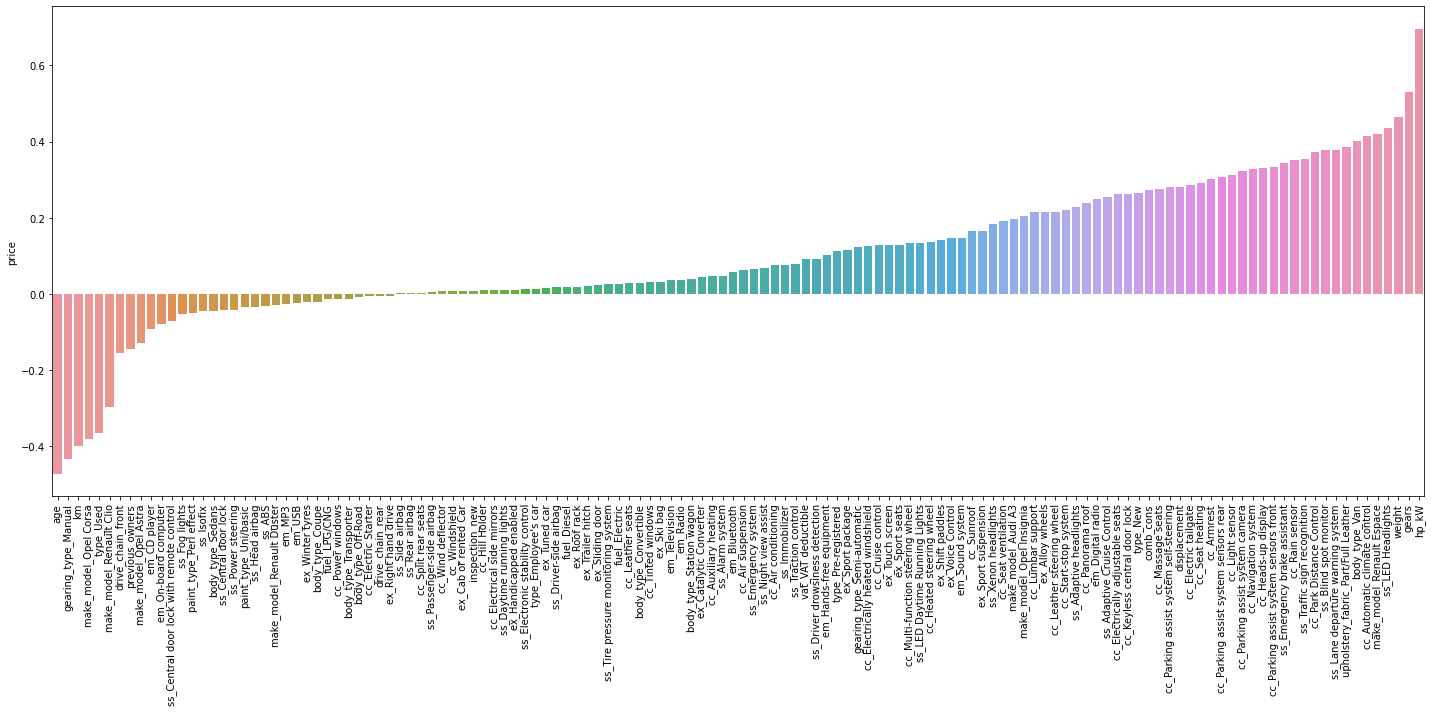

In [51]:
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_price.index, y = corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout();

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

In [52]:
#target variable if compressive strength
X=df.drop(['price'],axis=1)
Y=df['price']

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [55]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler =MinMaxScaler()

In [56]:
scaler.fit(X_train)

MinMaxScaler()

In [57]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[1.95583596e-01, 2.50000000e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.19672747e-03, 2.50000000e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [3.15457413e-05, 5.00000000e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [4.54416404e-02, 2.50000000e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.88643533e-04, 2.50000000e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.92271293e-02, 2.50000000e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [58]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[0.35743849, 0.25      , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.06446372, 0.25      , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04232492, 0.25      , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.19314511, 0.25      , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05088328, 0.25      , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.17633754, 0.25      , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [59]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131
mean,0.102,0.260,0.248,0.339,0.541,0.312,0.465,0.191,0.321,0.948,0.004,0.480,0.581,0.018,0.732,0.000,0.071,0.788,0.131,0.060,0.038,0.203,0.464,0.177,0.003,0.616,0.509,0.222,0.023,0.739,0.540,0.040,0.670,0.234,0.049,0.385,0.635,0.928,0.574,0.468,0.054,0.151,0.599,0.024,0.090,0.003,0.001,0.794,0.318,0.140,0.649,0.397,0.834,0.829,0.142,0.002,0.565,0.880,0.019,0.139,0.004,0.000,0.192,0.033,0.015,0.000,0.075,0.198,0.103,0.253,0.042,0.001,0.273,0.015,0.944,0.084,0.138,0.122,0.088,0.854,0.152,0.711,0.031,0.931,0.885,0.212,0.099,0.552,0.139,0.707,0.797,0.372,0.210,0.202,0.005,0.901,0.909,0.054,0.882,0.731,0.746,0.131,0.234,0.194,0.158,0.137,0.164,0.117,0.002,0.063,0.001,0.002,0.003,0.504,0.231,0.006,0.052,0.946,0.062,0.102,0.086,0.702,0.001,0.040,0.512,0.030,0.987,0.000,0.460,0.000,0.004,0.232
std,0.117,0.085,0.432,0.174,0.081,0.235,0.373,0.105,0.152,0.223,0.064,0.500,0.493,0.131,0.443,0.009,0.257,0.409,0.337,0.237,0.192,0.402,0.499,0.382,0.053,0.486,0.500,0.416,0.151,0.439,0.498,0.195,0.470,0.423,0.216,0.487,0.482,0.259,0.494,0.499,0.225,0.358,0.490,0.153,0.287,0.052,0.031,0.404,0.466,0.347,0.477,0.489,0.373,0.377,0.350,0.048,0.496,0.325,0.138,0.346,0.060,0.013,0.394,0.179,0.123,0.015,0.264,0.399,0.305,0.435,0.200,0.028,0.445,0.123,0.230,0.277,0.345,0.327,0.283,0.353,0.359,0.453,0.174,0.253,0.319,0.408,0.298,0.497,0.346,0.455,0.402,0.483,0.407,0.402,0.069,0.299,0.288,0.227,0.323,0.443,0.435,0.338,0.423,0.395,0.364,0.344,0.371,0.322,0.044,0.242,0.023,0.041,0.058,0.500,0.421,0.077,0.221,0.226,0.242,0.303,0.280,0.458,0.039,0.196,0.500,0.170,0.112,0.015,0.498,0.013,0.067,0.422


In [60]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131
mean,0.099,0.262,0.243,0.339,0.542,0.315,0.456,0.190,0.322,0.952,0.004,0.466,0.564,0.014,0.724,0.000,0.066,0.772,0.130,0.057,0.038,0.197,0.448,0.168,0.004,0.595,0.488,0.205,0.020,0.734,0.521,0.036,0.668,0.220,0.045,0.378,0.629,0.926,0.550,0.458,0.049,0.146,0.576,0.020,0.094,0.002,0.000,0.807,0.308,0.144,0.660,0.378,0.820,0.832,0.135,0.003,0.573,0.877,0.020,0.153,0.002,0.000,0.191,0.026,0.018,0.000,0.077,0.182,0.096,0.262,0.040,0.001,0.271,0.015,0.944,0.075,0.126,0.118,0.079,0.849,0.145,0.696,0.035,0.926,0.883,0.203,0.101,0.535,0.133,0.696,0.797,0.371,0.199,0.190,0.004,0.899,0.917,0.056,0.870,0.714,0.739,0.121,0.226,0.198,0.163,0.148,0.159,0.109,0.003,0.061,0.000,0.001,0.004,0.499,0.232,0.004,0.050,0.943,0.068,0.111,0.086,0.680,0.004,0.040,0.512,0.028,0.985,0.000,0.454,0.001,0.002,0.229
std,0.116,0.084,0.429,0.173,0.081,0.234,0.375,0.105,0.152,0.214,0.064,0.499,0.496,0.115,0.447,0.000,0.248,0.419,0.337,0.232,0.192,0.397,0.497,0.374,0.061,0.491,0.500,0.404,0.140,0.442,0.500,0.187,0.471,0.414,0.208,0.485,0.483,0.262,0.498,0.498,0.216,0.354,0.494,0.141,0.292,0.043,0.000,0.395,0.462,0.352,0.474,0.485,0.384,0.374,0.342,0.053,0.495,0.329,0.139,0.360,0.043,0.018,0.393,0.160,0.131,0.000,0.266,0.386,0.295,0.440,0.196,0.031,0.445,0.123,0.230,0.264,0.332,0.323,0.270,0.358,0.353,0.460,0.183,0.263,0.321,0.402,0.301,0.499,0.340,0.460,0.402,0.483,0.399,0.392,0.066,0.302,0.276,0.230,0.336,0.452,0.439,0.326,0.418,0.399,0.369,0.355,0.365,0.311,0.053,0.239,0.018,0.035,0.061,0.500,0.422,0.061,0.218,0.233,0.252,0.314,0.280,0.467,0.064,0.196,0.500,0.165,0.121,0.018,0.498,0.031,0.047,0.420


## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [61]:
from sklearn.linear_model import LinearRegression
#create a linear regression
lm = LinearRegression()

In [62]:
#fit the model with train set
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [63]:
#prediction of test and train sets
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [64]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

,lm_coef
0,-11467.671
1,372.117
2,-233.559
3,-1135.320
4,-2993.810
...,...
127,-4337.946
128,834.661
129,12401.179
130,368.627


In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, model_name):
    
    scores = {model_name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    model_name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [66]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,0.890,0.884
mae,1704.072,1724.214
mse,5988175.189,6357641.548
rmse,2447.075,2521.436


In [67]:
residuals = y_test-y_pred

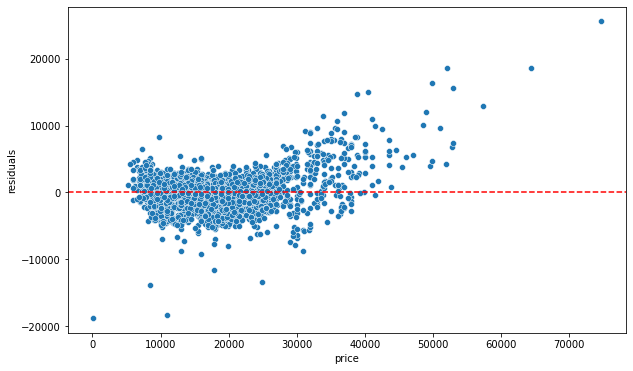

In [68]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

<AxesSubplot:xlabel='price', ylabel='Density'>

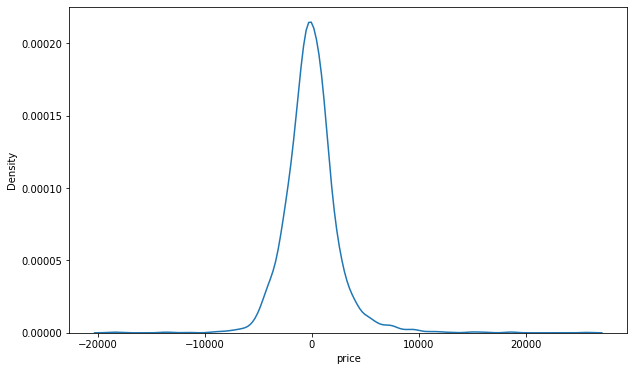

In [69]:
sns.kdeplot(residuals)

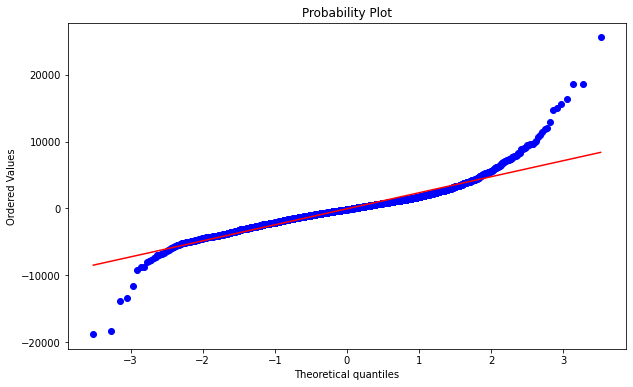

In [70]:
stats.probplot(residuals, dist ="norm", plot =plt);

In [71]:
from scipy.stats import skew
skew(residuals)

0.9852296739643313

## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

In [72]:
from sklearn.linear_model import Ridge

In [73]:
ridge_model = Ridge(alpha=1)

In [74]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1)

In [75]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [76]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.890,0.885
mae,1703.140,1721.438
mse,5994312.986,6302468.633
rmse,2448.329,2510.472


In [77]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])
rm_df

,ridge_coef_1
0,-11248.307
1,397.375
2,-240.452
3,-754.167
4,-2628.005
...,...
127,-3213.929
128,726.917
129,8156.443
130,286.337


In [78]:
pd.concat([ls, rs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.890,0.884,0.890,0.885
mae,1704.072,1724.214,1703.140,1721.438
mse,5988175.189,6357641.548,5994312.986,6302468.633
rmse,2447.075,2521.436,2448.329,2510.472


In [79]:
pd.concat([lm_df,rm_df], axis = 1)

,lm_coef,ridge_coef_1
0,-11467.671,-11248.307
1,372.117,397.375
2,-233.559,-240.452
3,-1135.320,-754.167
4,-2993.810,-2628.005
...,...,...
127,-4337.946,-3213.929
128,834.661,726.917
129,12401.179,8156.443
130,368.627,286.337


__Cross validation__

In [80]:
from sklearn.model_selection import cross_validate, cross_val_score

In [81]:
model = Ridge(alpha=1)
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [82]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.030,0.002,0.877,-1751.334,-6843147.227,-2615.941
2,0.030,0.002,0.887,-1747.463,-5988593.934,-2447.160
3,0.033,0.002,0.884,-1719.105,-6483700.287,-2546.311
4,0.039,0.002,0.903,-1655.530,-5141154.494,-2267.411
5,0.032,0.002,0.882,-1719.189,-5978948.664,-2445.189
6,0.030,0.002,0.878,-1685.801,-5957561.068,-2440.812
7,0.034,0.003,0.894,-1702.424,-5494200.154,-2343.971
8,0.045,0.003,0.882,-1864.637,-7694410.430,-2773.880
9,0.041,0.002,0.892,-1727.506,-6591899.517,-2567.469
10,0.032,0.003,0.888,-1671.834,-5580653.152,-2362.341


In [83]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                   0.887
test_neg_mean_absolute_error          -1724.482
test_neg_mean_squared_error        -6175426.893
test_neg_root_mean_squared_error      -2481.049
dtype: float64

Linear model and ridge regression have different scores. Moreover, ridge regression should be tuned by finding optimal value of alpha.

#### Choosing best alpha value with GridSearchCV for Ridge

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
#create serach space starting from 0.01 to 1 with spacing of 0.01
alpha_space = np.linspace(0.01, 1, 100)
alpha_space 

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [86]:
#create new ridge model
ridge_model = Ridge()

In [87]:
#define parameters
param_grid = {"alpha":alpha_space}

In [88]:
grid_ridge = GridSearchCV(estimator = ridge_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [89]:
grid_ridge.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END ...................................

[CV] END .........................................alpha=0.11; total time=   0.0s
[CV] END .........................................alpha=0.11; total time=   0.0s
[CV] END .........................................alpha=0.11; total time=   0.0s
[CV] END .........................................alpha=0.11; total time=   0.0s
[CV] END .........................................alpha=0.11; total time=   0.0s
[CV] END .........................................alpha=0.11; total time=   0.0s
[CV] END .........................................alpha=0.11; total time=   0.0s
[CV] END .........................................alpha=0.11; total time=   0.0s
[CV] END .........................................alpha=0.12; total time=   0.0s
[CV] END .........................................alpha=0.12; total time=   0.0s
[CV] END .........................................alpha=0.12; total time=   0.0s
[CV] END .........................................alpha=0.12; total time=   0.0s
[CV] END ...................

[CV] END ..........................alpha=0.21000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.21000000000000002; total time=   0.0s
[CV] END .........................................alpha=0.22; total time=   0.0s
[CV] END .........................................alpha=0.22; total time=   0.0s
[CV] END .........................................alpha=0.22; total time=   0.0s
[CV] END .........................................alpha=0.22; total time=   0.0s
[CV] END .........................................alpha=0.22; total time=   0.0s
[CV] END .........................................alpha=0.22; total time=   0.0s
[CV] END .........................................alpha=0.22; total time=   0.0s
[CV] END .........................................alpha=0.22; total time=   0.0s
[CV] END .........................................alpha=0.22; total time=   0.0s
[CV] END .........................................alpha=0.22; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.32; total time=   0.0s
[CV] END .........................................alpha=0.32; total time=   0.0s
[CV] END .........................................alpha=0.32; total time=   0.0s
[CV] END .........................................alpha=0.32; total time=   0.0s
[CV] END .........................................alpha=0.32; total time=   0.0s
[CV] END .........................................alpha=0.32; total time=   0.0s
[CV] END .........................................alpha=0.32; total time=   0.0s
[CV] END .........................................alpha=0.33; total time=   0.0s
[CV] END .........................................alpha=0.33; total time=   0.0s
[CV] END .........................................alpha=0.33; total time=   0.0s
[CV] END .........................................alpha=0.33; total time=   0.0s
[CV] END .........................................alpha=0.33; total time=   0.0s
[CV] END ...................

[CV] END ..........................alpha=0.42000000000000004; total time=   0.0s
[CV] END ..........................alpha=0.42000000000000004; total time=   0.0s
[CV] END ..........................alpha=0.42000000000000004; total time=   0.0s
[CV] END ..........................alpha=0.42000000000000004; total time=   0.0s
[CV] END ..........................alpha=0.42000000000000004; total time=   0.0s
[CV] END .........................................alpha=0.43; total time=   0.0s
[CV] END .........................................alpha=0.43; total time=   0.0s
[CV] END .........................................alpha=0.43; total time=   0.0s
[CV] END .........................................alpha=0.43; total time=   0.0s
[CV] END .........................................alpha=0.43; total time=   0.0s
[CV] END .........................................alpha=0.43; total time=   0.0s
[CV] END .........................................alpha=0.43; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.53; total time=   0.0s
[CV] END .........................................alpha=0.53; total time=   0.0s
[CV] END .........................................alpha=0.53; total time=   0.0s
[CV] END .........................................alpha=0.53; total time=   0.0s
[CV] END .........................................alpha=0.53; total time=   0.0s
[CV] END .........................................alpha=0.53; total time=   0.0s
[CV] END .........................................alpha=0.53; total time=   0.0s
[CV] END .........................................alpha=0.53; total time=   0.0s
[CV] END .........................................alpha=0.54; total time=   0.0s
[CV] END .........................................alpha=0.54; total time=   0.0s
[CV] END .........................................alpha=0.54; total time=   0.0s
[CV] END .........................................alpha=0.54; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.63; total time=   0.0s
[CV] END .........................................alpha=0.63; total time=   0.0s
[CV] END .........................................alpha=0.63; total time=   0.0s
[CV] END .........................................alpha=0.64; total time=   0.0s
[CV] END .........................................alpha=0.64; total time=   0.0s
[CV] END .........................................alpha=0.64; total time=   0.0s
[CV] END .........................................alpha=0.64; total time=   0.0s
[CV] END .........................................alpha=0.64; total time=   0.0s
[CV] END .........................................alpha=0.64; total time=   0.0s
[CV] END .........................................alpha=0.64; total time=   0.0s
[CV] END .........................................alpha=0.64; total time=   0.0s
[CV] END .........................................alpha=0.64; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.74; total time=   0.0s
[CV] END .........................................alpha=0.74; total time=   0.0s
[CV] END .........................................alpha=0.74; total time=   0.0s
[CV] END .........................................alpha=0.74; total time=   0.0s
[CV] END .........................................alpha=0.74; total time=   0.0s
[CV] END .........................................alpha=0.74; total time=   0.0s
[CV] END .........................................alpha=0.74; total time=   0.0s
[CV] END .........................................alpha=0.74; total time=   0.0s
[CV] END .........................................alpha=0.74; total time=   0.0s
[CV] END .........................................alpha=0.74; total time=   0.0s
[CV] END .........................................alpha=0.75; total time=   0.0s
[CV] END .........................................alpha=0.75; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=0.8400000000000001; total time=   0.0s
[CV] END ...........................alpha=0.8400000000000001; total time=   0.0s
[CV] END ...........................alpha=0.8400000000000001; total time=   0.0s
[CV] END ...........................alpha=0.8400000000000001; total time=   0.0s
[CV] END ...........................alpha=0.8400000000000001; total time=   0.0s
[CV] END ...........................alpha=0.8400000000000001; total time=   0.0s
[CV] END .........................................alpha=0.85; total time=   0.0s
[CV] END .........................................alpha=0.85; total time=   0.0s
[CV] END .........................................alpha=0.85; total time=   0.0s
[CV] END .........................................alpha=0.85; total time=   0.0s
[CV] END .........................................alpha=0.85; total time=   0.0s
[CV] END .........................................alpha=0.85; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=0.9400000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9500000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9500000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9500000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9500000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9500000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9500000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9500000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9500000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9500000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9500000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9600000000000001; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             scoring='neg_root_mean_squared_error', verbose=2)

In [90]:
grid_ridge.best_params_

{'alpha': 0.18000000000000002}

In [91]:
y_pred = grid_ridge.predict(X_test_scaled)
y_train_pred = grid_ridge.predict(X_train_scaled)

In [92]:
rgs = train_val(y_train, y_train_pred, y_test, y_pred, "grid_ridge")
rgs

,grid_ridge_train,grid_ridge_test
R2,0.890,0.885
mae,1703.771,1723.117
mse,5988478.595,6339797.381
rmse,2447.137,2517.895


In [93]:
pd.concat([ls, rs, rgs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test
R2,0.890,0.884,0.890,0.885,0.890,0.885
mae,1704.072,1724.214,1703.140,1721.438,1703.771,1723.117
mse,5988175.189,6357641.548,5994312.986,6302468.633,5988478.595,6339797.381
rmse,2447.075,2521.436,2448.329,2510.472,2447.137,2517.895


In [95]:
rm = Ridge(alpha=0.18).fit(X_train_scaled, y_train) 
rm.coef_

array([-1.14270348e+04,  3.77142010e+02, -2.34846552e+02, -1.06294905e+03,
       -2.92052176e+03,  1.76479893e+03, -4.74610943e+03,  2.30589639e+04,
        8.92494138e+02,  3.07531912e+02, -6.19799822e+02,  7.55625418e+01,
        2.71239539e+02, -2.07275549e+02,  3.06720080e+02, -1.03524839e+03,
       -7.67735498e+01,  1.58746864e+01,  9.76203023e+01,  4.88236303e+02,
        2.34913856e+03,  3.50551599e+02,  1.33877577e+02,  1.26733211e+02,
       -8.13927672e+02,  1.50655893e+02,  1.14880792e+02, -3.84413871e+02,
        4.34102907e+02,  1.59159770e+02,  3.07495668e+02, -2.39476876e+02,
        5.50220338e+02,  5.50948617e+01,  1.00570089e+03,  2.84438551e+02,
       -3.93242600e+02,  9.25039745e+01, -2.91213236e+02, -5.29371055e+00,
        7.61819490e+02, -1.85999871e+02, -5.17279798e+01,  7.35343846e+02,
        2.36023256e+01, -4.31392587e+02, -7.82533912e+01, -4.80868402e+02,
        7.22980722e+01,  7.64435028e+02, -4.62666602e+00,  8.06916240e+00,
       -3.08476390e+01,  

In [96]:
rgm_df = pd.DataFrame(rm.coef_, columns=["ridge_coef_0.18"])

In [97]:
pd.concat([lm_df,rm_df, rgm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_coef_0.18
0,-11467.671,-11248.307,-11427.035
1,372.117,397.375,377.142
2,-233.559,-240.452,-234.847
3,-1135.320,-754.167,-1062.949
4,-2993.810,-2628.005,-2920.522
...,...,...,...
127,-4337.946,-3213.929,-4081.937
128,834.661,726.917,813.986
129,12401.179,8156.443,11339.675
130,368.627,286.337,352.367


## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [98]:
from sklearn.linear_model import Lasso

In [99]:
lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1)

In [100]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [101]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.890,0.886
mae,1705.923,1721.462
mse,6010672.621,6254079.997
rmse,2451.667,2500.816


In [102]:
pd.concat([ls, rs, rgs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test
R2,0.890,0.884,0.890,0.885,0.890,0.885,0.890,0.886
mae,1704.072,1724.214,1703.140,1721.438,1703.771,1723.117,1705.923,1721.462
mse,5988175.189,6357641.548,5994312.986,6302468.633,5988478.595,6339797.381,6010672.621,6254079.997
rmse,2447.075,2521.436,2448.329,2510.472,2447.137,2517.895,2451.667,2500.816


In [103]:
model = Lasso(alpha=1)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [104]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.189,0.003,0.876,-1752.578,-6886094.430,-2624.137
2,0.187,0.003,0.886,-1748.582,-6015558.867,-2452.664
3,0.196,0.002,0.885,-1719.511,-6467661.387,-2543.160
4,0.199,0.002,0.903,-1657.410,-5145676.778,-2268.408
5,0.204,0.003,0.882,-1719.823,-5968906.328,-2443.135
6,0.198,0.003,0.878,-1684.000,-5974995.297,-2444.380
7,0.192,0.002,0.894,-1702.912,-5497630.489,-2344.703
8,0.189,0.002,0.882,-1864.882,-7692829.237,-2773.595
9,0.219,0.002,0.892,-1729.857,-6576037.933,-2564.379
10,0.222,0.002,0.887,-1674.369,-5605935.718,-2367.686


In [105]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

,lasso_train,lasso_test
R2,0.890,0.886
mae,1705.923,1721.462
mse,6010672.621,6254079.997
rmse,2451.667,2500.816


In [106]:
lasso_model.coef_

array([-1.12497255e+04,  2.41096542e+02, -2.30376118e+02, -6.77959390e+02,
       -2.06203884e+03,  1.71934917e+03, -4.78685549e+03,  2.26011050e+04,
        6.87856156e+02,  2.90887822e+02, -4.09827527e+02,  8.30257132e+01,
        2.69128165e+02, -1.68068832e+02,  2.92183826e+02, -0.00000000e+00,
       -4.63420215e+01,  1.48447121e+01,  8.25367834e+01,  4.56448377e+02,
        2.33061576e+03,  3.31407789e+02,  1.29678212e+02,  1.28344528e+02,
       -4.67843976e+02,  1.51988274e+02,  1.03382945e+02, -3.85185555e+02,
        3.81789106e+02,  1.42081304e+02,  3.07798411e+02, -1.74938750e+02,
        5.40716200e+02,  4.34328970e+01,  1.00988005e+03,  2.64859805e+02,
       -3.65659069e+02,  7.42838806e+01, -2.63484527e+02,  9.23811557e+00,
        7.57134133e+02, -1.57715252e+02, -4.41526182e+01,  7.01225666e+02,
       -0.00000000e+00, -1.29686544e+02, -0.00000000e+00, -4.69552798e+02,
        6.81780373e+01,  7.58444936e+02, -8.13519676e+00,  0.00000000e+00,
       -2.87260620e+01,  

In [107]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [108]:
pd.concat([lm_df,rm_df, rgm_df, lsm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_coef_0.18,lasso_coef_1
0,-11467.671,-11248.307,-11427.035,-11249.725
1,372.117,397.375,377.142,241.097
2,-233.559,-240.452,-234.847,-230.376
3,-1135.320,-754.167,-1062.949,-677.959
4,-2993.810,-2628.005,-2920.522,-2062.039
...,...,...,...,...
127,-4337.946,-3213.929,-4081.937,-0.000
128,834.661,726.917,813.986,657.650
129,12401.179,8156.443,11339.675,5538.636
130,368.627,286.337,352.367,35.459


In [109]:
lasso_model = Lasso(max_iter=100000)

In [110]:
#create serach space starting from 0.0001 to 0.01 with spacing of 0.0001
alpha_space = np.linspace(0.2, 0.5, 31)
alpha_space 

array([0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 ,
       0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41,
       0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 ])

In [111]:
param_grid = {"alpha":alpha_space}

In [112]:
grid_lasso = GridSearchCV(estimator = lasso_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [113]:
grid_lasso.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 31 candidates, totalling 310 fits
[CV] END ..........................................alpha=0.2; total time=   0.1s
[CV] END ..........................................alpha=0.2; total time=   0.2s
[CV] END ..........................................alpha=0.2; total time=   0.2s
[CV] END ..........................................alpha=0.2; total time=   0.2s
[CV] END ..........................................alpha=0.2; total time=   0.2s
[CV] END ..........................................alpha=0.2; total time=   0.2s
[CV] END ..........................................alpha=0.2; total time=   0.2s
[CV] END ..........................................alpha=0.2; total time=   0.2s
[CV] END ..........................................alpha=0.2; total time=   0.2s
[CV] END ..........................................alpha=0.2; total time=   0.2s
[CV] END ..........................alpha=0.21000000000000002; total time=   0.2s
[CV] END ..........................alpha=0.210

[CV] END ..........................alpha=0.30000000000000004; total time=   0.1s
[CV] END ..........................alpha=0.30000000000000004; total time=   0.2s
[CV] END ..........................alpha=0.30000000000000004; total time=   0.2s
[CV] END ..........................alpha=0.30000000000000004; total time=   0.1s
[CV] END ..........................alpha=0.30000000000000004; total time=   0.1s
[CV] END ..........................alpha=0.30000000000000004; total time=   0.1s
[CV] END ..........................alpha=0.30000000000000004; total time=   0.1s
[CV] END ..........................alpha=0.30000000000000004; total time=   0.1s
[CV] END ..........................alpha=0.30000000000000004; total time=   0.1s
[CV] END .........................................alpha=0.31; total time=   0.2s
[CV] END .........................................alpha=0.31; total time=   0.1s
[CV] END .........................................alpha=0.31; total time=   0.2s
[CV] END ...................

[CV] END ..........................................alpha=0.4; total time=   0.5s
[CV] END ..........................................alpha=0.4; total time=   0.5s
[CV] END ..........................................alpha=0.4; total time=   0.3s
[CV] END ..........................................alpha=0.4; total time=   0.2s
[CV] END ..........................................alpha=0.4; total time=   0.2s
[CV] END ..........................................alpha=0.4; total time=   0.2s
[CV] END ..........................................alpha=0.4; total time=   0.3s
[CV] END ..........................alpha=0.41000000000000003; total time=   0.2s
[CV] END ..........................alpha=0.41000000000000003; total time=   0.1s
[CV] END ..........................alpha=0.41000000000000003; total time=   0.2s
[CV] END ..........................alpha=0.41000000000000003; total time=   0.1s
[CV] END ..........................alpha=0.41000000000000003; total time=   0.1s
[CV] END ...................

[CV] END ..........................................alpha=0.5; total time=   0.1s
[CV] END ..........................................alpha=0.5; total time=   0.1s
[CV] END ..........................................alpha=0.5; total time=   0.1s
[CV] END ..........................................alpha=0.5; total time=   0.1s
[CV] END ..........................................alpha=0.5; total time=   0.1s


GridSearchCV(cv=10, estimator=Lasso(max_iter=100000),
             param_grid={'alpha': array([0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 ,
       0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41,
       0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 ])},
             scoring='neg_root_mean_squared_error', verbose=2)

In [114]:
grid_lasso.best_params_

{'alpha': 0.28}

In [115]:
y_pred = grid_lasso.predict(X_test_scaled)
y_train_pred = grid_lasso.predict(X_train_scaled)

In [116]:
lgs = train_val(y_train, y_train_pred, y_test, y_pred, "grid_lasso")
lgs

,grid_lasso_train,grid_lasso_test
R2,0.890,0.885
mae,1704.136,1722.039
mse,5991012.014,6312719.878
rmse,2447.654,2512.513


In [117]:
pd.concat([ls, rs, rgs, lss, lgs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test,grid_lasso_train,grid_lasso_test
R2,0.890,0.884,0.890,0.885,0.890,0.885,0.890,0.886,0.890,0.885
mae,1704.072,1724.214,1703.140,1721.438,1703.771,1723.117,1705.923,1721.462,1704.136,1722.039
mse,5988175.189,6357641.548,5994312.986,6302468.633,5988478.595,6339797.381,6010672.621,6254079.997,5991012.014,6312719.878
rmse,2447.075,2521.436,2448.329,2510.472,2447.137,2517.895,2451.667,2500.816,2447.654,2512.513


In [118]:
lsm = Lasso(alpha=0.28).fit(X_train_scaled, y_train) # 'GridSearchCV' object has no attribute 'coef_'
lsm.coef_

array([-1.14063059e+04,  3.41379442e+02, -2.33216361e+02, -1.00734136e+03,
       -2.72511025e+03,  1.75147626e+03, -4.75148733e+03,  2.30895451e+04,
        8.29565627e+02,  3.02464212e+02, -5.29593565e+02,  7.70800762e+01,
        2.70469534e+02, -1.93949936e+02,  3.04081522e+02, -0.00000000e+00,
       -6.68898002e+01,  1.60021497e+01,  9.34640869e+01,  4.82119149e+02,
        2.33790426e+03,  3.44115944e+02,  1.33864489e+02,  1.26874200e+02,
       -7.22440954e+02,  1.51908330e+02,  1.11828473e+02, -3.85955992e+02,
        4.27022660e+02,  1.54021851e+02,  3.06905678e+02, -2.19349070e+02,
        5.47619112e+02,  5.14339996e+01,  1.01047618e+03,  2.79248475e+02,
       -3.87544840e+02,  8.58219710e+01, -2.84963894e+02,  0.00000000e+00,
        7.58465045e+02, -1.75898093e+02, -5.07681238e+01,  7.34226297e+02,
        1.00003882e+01, -3.75629694e+02, -0.00000000e+00, -4.76626584e+02,
        7.16569124e+01,  7.61035191e+02, -6.56844517e+00,  6.06694857e+00,
       -2.97620562e+01,  

In [119]:
lgm_df = pd.DataFrame(lsm.coef_, columns=["lasso_coef_0.28"])

In [120]:
pd.concat([lm_df, rm_df, rgm_df, lsm_df, lgm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_coef_0.18,lasso_coef_1,lasso_coef_0.28
0,-11467.671,-11248.307,-11427.035,-11249.725,-11406.306
1,372.117,397.375,377.142,241.097,341.379
2,-233.559,-240.452,-234.847,-230.376,-233.216
3,-1135.320,-754.167,-1062.949,-677.959,-1007.341
4,-2993.810,-2628.005,-2920.522,-2062.039,-2725.110
...,...,...,...,...,...
127,-4337.946,-3213.929,-4081.937,-0.000,-3090.902
128,834.661,726.917,813.986,657.650,787.100
129,12401.179,8156.443,11339.675,5538.636,10476.291
130,368.627,286.337,352.367,35.459,276.382


## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [121]:
from sklearn.linear_model import ElasticNet

In [122]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5)
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1)

In [123]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [124]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.601,0.606
mae,3365.361,3373.447
mse,21711590.316,21668342.162
rmse,4659.570,4654.927


In [125]:
pd.concat([ls,rs, rgs, lss, lgs, es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test,grid_lasso_train,grid_lasso_test,elastic_train,elastic_test
R2,0.890,0.884,0.890,0.885,0.890,0.885,0.890,0.886,0.890,0.885,0.601,0.606
mae,1704.072,1724.214,1703.140,1721.438,1703.771,1723.117,1705.923,1721.462,1704.136,1722.039,3365.361,3373.447
mse,5988175.189,6357641.548,5994312.986,6302468.633,5988478.595,6339797.381,6010672.621,6254079.997,5991012.014,6312719.878,21711590.316,21668342.162
rmse,2447.075,2521.436,2448.329,2510.472,2447.137,2517.895,2451.667,2500.816,2447.654,2512.513,4659.570,4654.927


In [126]:
model = ElasticNet(alpha=1, l1_ratio=0.5)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [127]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.583,-3333.800,-23130507.713,-4809.419
2,0.605,-3353.652,-20840797.757,-4565.172
3,0.597,-3447.818,-22580903.017,-4751.937
4,0.615,-3409.795,-20319291.080,-4507.692
5,0.604,-3307.021,-19984830.330,-4470.440
6,0.617,-3223.255,-18725592.670,-4327.308
7,0.593,-3405.793,-21164460.549,-4600.485
8,0.577,-3639.031,-27501917.078,-5244.227
9,0.604,-3381.587,-24050048.469,-4904.085
10,0.602,-3210.227,-19736368.600,-4442.563


In [128]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                    0.600
test_neg_mean_absolute_error           -3371.198
test_neg_mean_squared_error        -21803471.726
test_neg_root_mean_squared_error       -4662.333
dtype: float64

In [129]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

,elastic_train,elastic_test
R2,0.601,0.606
mae,3365.361,3373.447
mse,21711590.316,21668342.162
rmse,4659.570,4654.927


In [130]:
elastic_model.coef_

array([-4.50956793e+02, -1.06225128e+02, -1.45612269e+02,  2.90404826e+02,
        2.56496796e+02,  8.29568193e+02, -1.51892835e+03,  5.16245600e+02,
        2.86766200e+02,  4.03583170e+01,  1.04857331e+01,  4.84998299e+02,
        8.00518552e+02, -9.51294418e+00,  6.59681392e+01, -0.00000000e+00,
        2.81051144e+02, -2.98691936e+02,  3.62912891e+02,  1.19980746e+02,
        4.27416318e+02, -3.94070289e+01, -2.07912787e+02,  2.86771351e+02,
       -2.46327474e-01,  1.90644791e+02,  3.67918862e+02,  7.38994838e+01,
        2.39478417e+02,  1.28036265e+01,  4.82461446e+02,  2.67997367e+02,
        6.14544116e+02,  3.80107238e+02,  2.94876910e+02,  4.09920696e+02,
        2.61026424e+02, -1.25647078e+02,  4.20235690e+02,  4.22925600e+02,
        2.89357714e+02, -6.05755597e+00,  3.70642017e+02,  1.53696983e+02,
       -1.44276816e+01, -1.89859181e+00, -0.00000000e+00, -1.01122634e+02,
       -2.48237955e+02,  3.75285467e+02, -1.04034595e+01, -1.66154933e+02,
       -4.34197754e+02,  

In [131]:
em_df = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, l1:0.5)"])

In [132]:
pd.concat([lm_df, rm_df, rgm_df, lsm_df, lgm_df, em_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_coef_0.18,lasso_coef_1,lasso_coef_0.28,"elastic_coef_(alp:1, l1:0.5)"
0,-11467.671,-11248.307,-11427.035,-11249.725,-11406.306,-450.957
1,372.117,397.375,377.142,241.097,341.379,-106.225
2,-233.559,-240.452,-234.847,-230.376,-233.216,-145.612
3,-1135.320,-754.167,-1062.949,-677.959,-1007.341,290.405
4,-2993.810,-2628.005,-2920.522,-2062.039,-2725.110,256.497
...,...,...,...,...,...,...
127,-4337.946,-3213.929,-4081.937,-0.000,-3090.902,-0.000
128,834.661,726.917,813.986,657.650,787.100,-122.057
129,12401.179,8156.443,11339.675,5538.636,10476.291,4.469
130,368.627,286.337,352.367,35.459,276.382,-5.136


In [133]:
from sklearn.model_selection import GridSearchCV

In [134]:
elastic_model = ElasticNet(max_iter=10000)

In [152]:
param_grid = {"alpha":[10, 12, 13, 14, 15, 16, 17],
            "l1_ratio":[2, 3, 4, 5, 6]}

In [153]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [154]:
grid_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 35 candidates, totalling 350 fits
[CV] END ...............................alpha=10, l1_ratio=2; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=2; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=2; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=2; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=2; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=2; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=2; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=2; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=2; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=2; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=3; total time=   0.0s
[CV] END ...............................alpha=

[CV] END ...............................alpha=13, l1_ratio=2; total time=   0.0s
[CV] END ...............................alpha=13, l1_ratio=2; total time=   0.0s
[CV] END ...............................alpha=13, l1_ratio=2; total time=   0.0s
[CV] END ...............................alpha=13, l1_ratio=3; total time=   0.0s
[CV] END ...............................alpha=13, l1_ratio=3; total time=   0.0s
[CV] END ...............................alpha=13, l1_ratio=3; total time=   0.0s
[CV] END ...............................alpha=13, l1_ratio=3; total time=   0.0s
[CV] END ...............................alpha=13, l1_ratio=3; total time=   0.0s
[CV] END ...............................alpha=13, l1_ratio=3; total time=   0.0s
[CV] END ...............................alpha=13, l1_ratio=3; total time=   0.0s
[CV] END ...............................alpha=13, l1_ratio=3; total time=   0.0s
[CV] END ...............................alpha=13, l1_ratio=3; total time=   0.0s
[CV] END ...................

[CV] END ...............................alpha=15, l1_ratio=4; total time=   0.0s
[CV] END ...............................alpha=15, l1_ratio=4; total time=   0.0s
[CV] END ...............................alpha=15, l1_ratio=4; total time=   0.0s
[CV] END ...............................alpha=15, l1_ratio=4; total time=   0.0s
[CV] END ...............................alpha=15, l1_ratio=4; total time=   0.0s
[CV] END ...............................alpha=15, l1_ratio=4; total time=   0.0s
[CV] END ...............................alpha=15, l1_ratio=4; total time=   0.0s
[CV] END ...............................alpha=15, l1_ratio=4; total time=   0.0s
[CV] END ...............................alpha=15, l1_ratio=5; total time=   0.0s
[CV] END ...............................alpha=15, l1_ratio=5; total time=   0.0s
[CV] END ...............................alpha=15, l1_ratio=5; total time=   0.0s
[CV] END ...............................alpha=15, l1_ratio=5; total time=   0.0s
[CV] END ...................

[CV] END ...............................alpha=17, l1_ratio=5; total time=   0.0s
[CV] END ...............................alpha=17, l1_ratio=6; total time=   0.0s
[CV] END ...............................alpha=17, l1_ratio=6; total time=   0.0s
[CV] END ...............................alpha=17, l1_ratio=6; total time=   0.0s
[CV] END ...............................alpha=17, l1_ratio=6; total time=   0.0s
[CV] END ...............................alpha=17, l1_ratio=6; total time=   0.0s
[CV] END ...............................alpha=17, l1_ratio=6; total time=   0.0s
[CV] END ...............................alpha=17, l1_ratio=6; total time=   0.0s
[CV] END ...............................alpha=17, l1_ratio=6; total time=   0.0s
[CV] END ...............................alpha=17, l1_ratio=6; total time=   0.0s
[CV] END ...............................alpha=17, l1_ratio=6; total time=   0.0s


ValueError: l1_ratio must be between 0 and 1; got l1_ratio=2

In [155]:
grid_model.best_params_

{'alpha': 10, 'l1_ratio': 2}

In [156]:
elastic_model = ElasticNet(max_iter=10000)

In [157]:
param_grid = {"alpha":[9.8, 9.9, 10, 10.1, 10.2],
            "l1_ratio":[1.8, 1.9, 2, 2.1, 2.2]}

In [158]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [159]:
grid_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV] END ............................alpha=9.8, l1_ratio=1.8; total time=   0.0s
[CV] END ............................alpha=9.8, l1_ratio=1.8; total time=   0.0s
[CV] END ............................alpha=9.8, l1_ratio=1.8; total time=   0.0s
[CV] END ............................alpha=9.8, l1_ratio=1.8; total time=   0.0s
[CV] END ............................alpha=9.8, l1_ratio=1.8; total time=   0.0s
[CV] END ............................alpha=9.8, l1_ratio=1.8; total time=   0.0s
[CV] END ............................alpha=9.8, l1_ratio=1.8; total time=   0.0s
[CV] END ............................alpha=9.8, l1_ratio=1.8; total time=   0.0s
[CV] END ............................alpha=9.8, l1_ratio=1.8; total time=   0.0s
[CV] END ............................alpha=9.8, l1_ratio=1.8; total time=   0.0s
[CV] END ............................alpha=9.8, l1_ratio=1.9; total time=   0.0s
[CV] END ............................alpha=9.8

[CV] END .............................alpha=10, l1_ratio=1.8; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=1.8; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=1.8; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=1.8; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=1.9; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=1.9; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=1.9; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=1.9; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=1.9; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=1.9; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=1.9; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=1.9; total time=   0.0s
[CV] END ...................

[CV] END .............................alpha=10.2, l1_ratio=2; total time=   0.0s
[CV] END .............................alpha=10.2, l1_ratio=2; total time=   0.0s
[CV] END .............................alpha=10.2, l1_ratio=2; total time=   0.0s
[CV] END .............................alpha=10.2, l1_ratio=2; total time=   0.0s
[CV] END .............................alpha=10.2, l1_ratio=2; total time=   0.0s
[CV] END .............................alpha=10.2, l1_ratio=2; total time=   0.0s
[CV] END .............................alpha=10.2, l1_ratio=2; total time=   0.0s
[CV] END .............................alpha=10.2, l1_ratio=2; total time=   0.0s
[CV] END .............................alpha=10.2, l1_ratio=2; total time=   0.0s
[CV] END ...........................alpha=10.2, l1_ratio=2.1; total time=   0.0s
[CV] END ...........................alpha=10.2, l1_ratio=2.1; total time=   0.0s
[CV] END ...........................alpha=10.2, l1_ratio=2.1; total time=   0.0s
[CV] END ...................

ValueError: l1_ratio must be between 0 and 1; got l1_ratio=1.8

In [160]:
grid_model.best_params_

{'alpha': 9.8, 'l1_ratio': 1.8}

In [161]:
param_grid = {"alpha":[5, 6, 7, 8, 9.8],
            "l1_ratio":[1, 1.3, 1.5, 1.7, 1.8]}

In [162]:
elastic_model = ElasticNet(max_iter=10000)

In [163]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [164]:
grid_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV] END ................................alpha=5, l1_ratio=1; total time=   0.1s
[CV] END ................................alpha=5, l1_ratio=1; total time=   0.1s
[CV] END ................................alpha=5, l1_ratio=1; total time=   0.1s
[CV] END ................................alpha=5, l1_ratio=1; total time=   0.1s
[CV] END ................................alpha=5, l1_ratio=1; total time=   0.1s
[CV] END ................................alpha=5, l1_ratio=1; total time=   0.1s
[CV] END ................................alpha=5, l1_ratio=1; total time=   0.1s
[CV] END ................................alpha=5, l1_ratio=1; total time=   0.1s
[CV] END ................................alpha=5, l1_ratio=1; total time=   0.1s
[CV] END ................................alpha=5, l1_ratio=1; total time=   0.1s
[CV] END ..............................alpha=5, l1_ratio=1.3; total time=   0.0s
[CV] END ..............................alpha=5

[CV] END ................................alpha=7, l1_ratio=1; total time=   0.1s
[CV] END ................................alpha=7, l1_ratio=1; total time=   0.1s
[CV] END ................................alpha=7, l1_ratio=1; total time=   0.1s
[CV] END ................................alpha=7, l1_ratio=1; total time=   0.1s
[CV] END ................................alpha=7, l1_ratio=1; total time=   0.1s
[CV] END ................................alpha=7, l1_ratio=1; total time=   0.1s
[CV] END ................................alpha=7, l1_ratio=1; total time=   0.1s
[CV] END ................................alpha=7, l1_ratio=1; total time=   0.1s
[CV] END ................................alpha=7, l1_ratio=1; total time=   0.1s
[CV] END ..............................alpha=7, l1_ratio=1.3; total time=   0.0s
[CV] END ..............................alpha=7, l1_ratio=1.3; total time=   0.0s
[CV] END ..............................alpha=7, l1_ratio=1.3; total time=   0.0s
[CV] END ...................

[CV] END ..............................alpha=9.8, l1_ratio=1; total time=   0.4s
[CV] END ..............................alpha=9.8, l1_ratio=1; total time=   0.8s
[CV] END ..............................alpha=9.8, l1_ratio=1; total time=   0.4s
[CV] END ..............................alpha=9.8, l1_ratio=1; total time=   0.1s
[CV] END ..............................alpha=9.8, l1_ratio=1; total time=   0.6s
[CV] END ..............................alpha=9.8, l1_ratio=1; total time=   0.2s
[CV] END ..............................alpha=9.8, l1_ratio=1; total time=   0.1s
[CV] END ............................alpha=9.8, l1_ratio=1.3; total time=   0.0s
[CV] END ............................alpha=9.8, l1_ratio=1.3; total time=   0.0s
[CV] END ............................alpha=9.8, l1_ratio=1.3; total time=   0.0s
[CV] END ............................alpha=9.8, l1_ratio=1.3; total time=   0.0s
[CV] END ............................alpha=9.8, l1_ratio=1.3; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000),
             param_grid={'alpha': [5, 6, 7, 8, 9.8],
                         'l1_ratio': [1, 1.3, 1.5, 1.7, 1.8]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [165]:
grid_model.best_params_

{'alpha': 5, 'l1_ratio': 1}

In [135]:
elastic_model = ElasticNet(max_iter=10000)

In [136]:
param_grid = {"alpha":[0.8, 0.9, 1.0,1.1],
            "l1_ratio":[0.8,0.9, 1.0,1.1]}

In [137]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [138]:
grid_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] END ............................alpha=0.8, l1_ratio=0.8; total time=   0.0s
[CV] END ............................alpha=0.8, l1_ratio=0.8; total time=   0.0s
[CV] END ............................alpha=0.8, l1_ratio=0.8; total time=   0.0s
[CV] END ............................alpha=0.8, l1_ratio=0.8; total time=   0.0s
[CV] END ............................alpha=0.8, l1_ratio=0.8; total time=   0.0s
[CV] END ............................alpha=0.8, l1_ratio=0.8; total time=   0.1s
[CV] END ............................alpha=0.8, l1_ratio=0.8; total time=   0.0s
[CV] END ............................alpha=0.8, l1_ratio=0.8; total time=   0.0s
[CV] END ............................alpha=0.8, l1_ratio=0.8; total time=   0.0s
[CV] END ............................alpha=0.8, l1_ratio=0.8; total time=   0.0s
[CV] END ............................alpha=0.8, l1_ratio=0.9; total time=   0.1s
[CV] END ............................alpha=0.8

[CV] END ............................alpha=1.0, l1_ratio=1.0; total time=   0.1s
[CV] END ............................alpha=1.0, l1_ratio=1.0; total time=   0.2s
[CV] END ............................alpha=1.0, l1_ratio=1.0; total time=   0.2s
[CV] END ............................alpha=1.0, l1_ratio=1.0; total time=   0.2s
[CV] END ............................alpha=1.0, l1_ratio=1.0; total time=   0.2s
[CV] END ............................alpha=1.0, l1_ratio=1.0; total time=   0.2s
[CV] END ............................alpha=1.0, l1_ratio=1.0; total time=   0.1s
[CV] END ............................alpha=1.0, l1_ratio=1.0; total time=   0.1s
[CV] END ............................alpha=1.0, l1_ratio=1.0; total time=   0.1s
[CV] END ............................alpha=1.0, l1_ratio=1.1; total time=   0.0s
[CV] END ............................alpha=1.0, l1_ratio=1.1; total time=   0.0s
[CV] END ............................alpha=1.0, l1_ratio=1.1; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000),
             param_grid={'alpha': [0.8, 0.9, 1.0, 1.1],
                         'l1_ratio': [0.8, 0.9, 1.0, 1.1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [139]:
grid_model.best_params_

{'alpha': 0.8, 'l1_ratio': 1.0}

In [140]:
y_pred = grid_model.predict(X_test_scaled) # ElasticNet(alpha=0.8, l1_ratio=1.0)
y_train_pred = grid_model.predict(X_train_scaled)

In [141]:
egs=train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")
egs

,GridSearch_train,GridSearch_test
R2,0.890,0.886
mae,1705.274,1721.404
mse,6003385.211,6264813.471
rmse,2450.181,2502.961


In [142]:
pd.concat([ls,rs, rgs, lss, lgs, es,egs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test,grid_lasso_train,grid_lasso_test,elastic_train,elastic_test,GridSearch_train,GridSearch_test
R2,0.890,0.884,0.890,0.885,0.890,0.885,0.890,0.886,0.890,0.885,0.601,0.606,0.890,0.886
mae,1704.072,1724.214,1703.140,1721.438,1703.771,1723.117,1705.923,1721.462,1704.136,1722.039,3365.361,3373.447,1705.274,1721.404
mse,5988175.189,6357641.548,5994312.986,6302468.633,5988478.595,6339797.381,6010672.621,6254079.997,5991012.014,6312719.878,21711590.316,21668342.162,6003385.211,6264813.471
rmse,2447.075,2521.436,2448.329,2510.472,2447.137,2517.895,2451.667,2500.816,2447.654,2512.513,4659.570,4654.927,2450.181,2502.961


In [143]:
esm = ElasticNet(alpha=0.8, l1_ratio=1.0).fit(X_train_scaled, y_train) # 'GridSearchCV' object has no attribute 'coef_'
esm.coef_

array([-1.12915990e+04,  2.69133966e+02, -2.30914973e+02, -7.69735147e+02,
       -2.24425603e+03,  1.72846078e+03, -4.77732572e+03,  2.27388384e+04,
        7.27812447e+02,  2.94569935e+02, -4.40873437e+02,  8.14845104e+01,
        2.69341206e+02, -1.75228873e+02,  2.95577727e+02, -0.00000000e+00,
       -5.24650312e+01,  1.52504395e+01,  8.51715190e+01,  4.63557255e+02,
        2.33243230e+03,  3.35321327e+02,  1.30813892e+02,  1.28038788e+02,
       -5.38468757e+02,  1.51964016e+02,  1.06110731e+02, -3.85354925e+02,
        3.95940963e+02,  1.45221958e+02,  3.07607315e+02, -1.86495256e+02,
        5.42795152e+02,  4.56496242e+01,  1.01064150e+03,  2.68682689e+02,
       -3.71968942e+02,  7.78286841e+01, -2.69456564e+02,  6.38788720e+00,
        7.57281199e+02, -1.61961069e+02, -4.58246896e+01,  7.10650337e+02,
        0.00000000e+00, -1.94347505e+02, -0.00000000e+00, -4.70732310e+02,
        6.93454638e+01,  7.58983299e+02, -7.93477684e+00,  0.00000000e+00,
       -2.87898153e+01,  

In [144]:
esm_df = pd.DataFrame(esm.coef_, columns=["elastic_coef_(alp:0.8, l1:1.0)"])

In [145]:
pd.concat([lm_df, rm_df, rgm_df, lsm_df, lgm_df, em_df, esm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_coef_0.18,lasso_coef_1,lasso_coef_0.28,"elastic_coef_(alp:1, l1:0.5)","elastic_coef_(alp:0.8, l1:1.0)"
0,-11467.671,-11248.307,-11427.035,-11249.725,-11406.306,-450.957,-11291.599
1,372.117,397.375,377.142,241.097,341.379,-106.225,269.134
2,-233.559,-240.452,-234.847,-230.376,-233.216,-145.612,-230.915
3,-1135.320,-754.167,-1062.949,-677.959,-1007.341,290.405,-769.735
4,-2993.810,-2628.005,-2920.522,-2062.039,-2725.110,256.497,-2244.256
...,...,...,...,...,...,...,...
127,-4337.946,-3213.929,-4081.937,-0.000,-3090.902,-0.000,-761.910
128,834.661,726.917,813.986,657.650,787.100,-122.057,693.925
129,12401.179,8156.443,11339.675,5538.636,10476.291,4.469,6881.349
130,368.627,286.337,352.367,35.459,276.382,-5.136,102.779


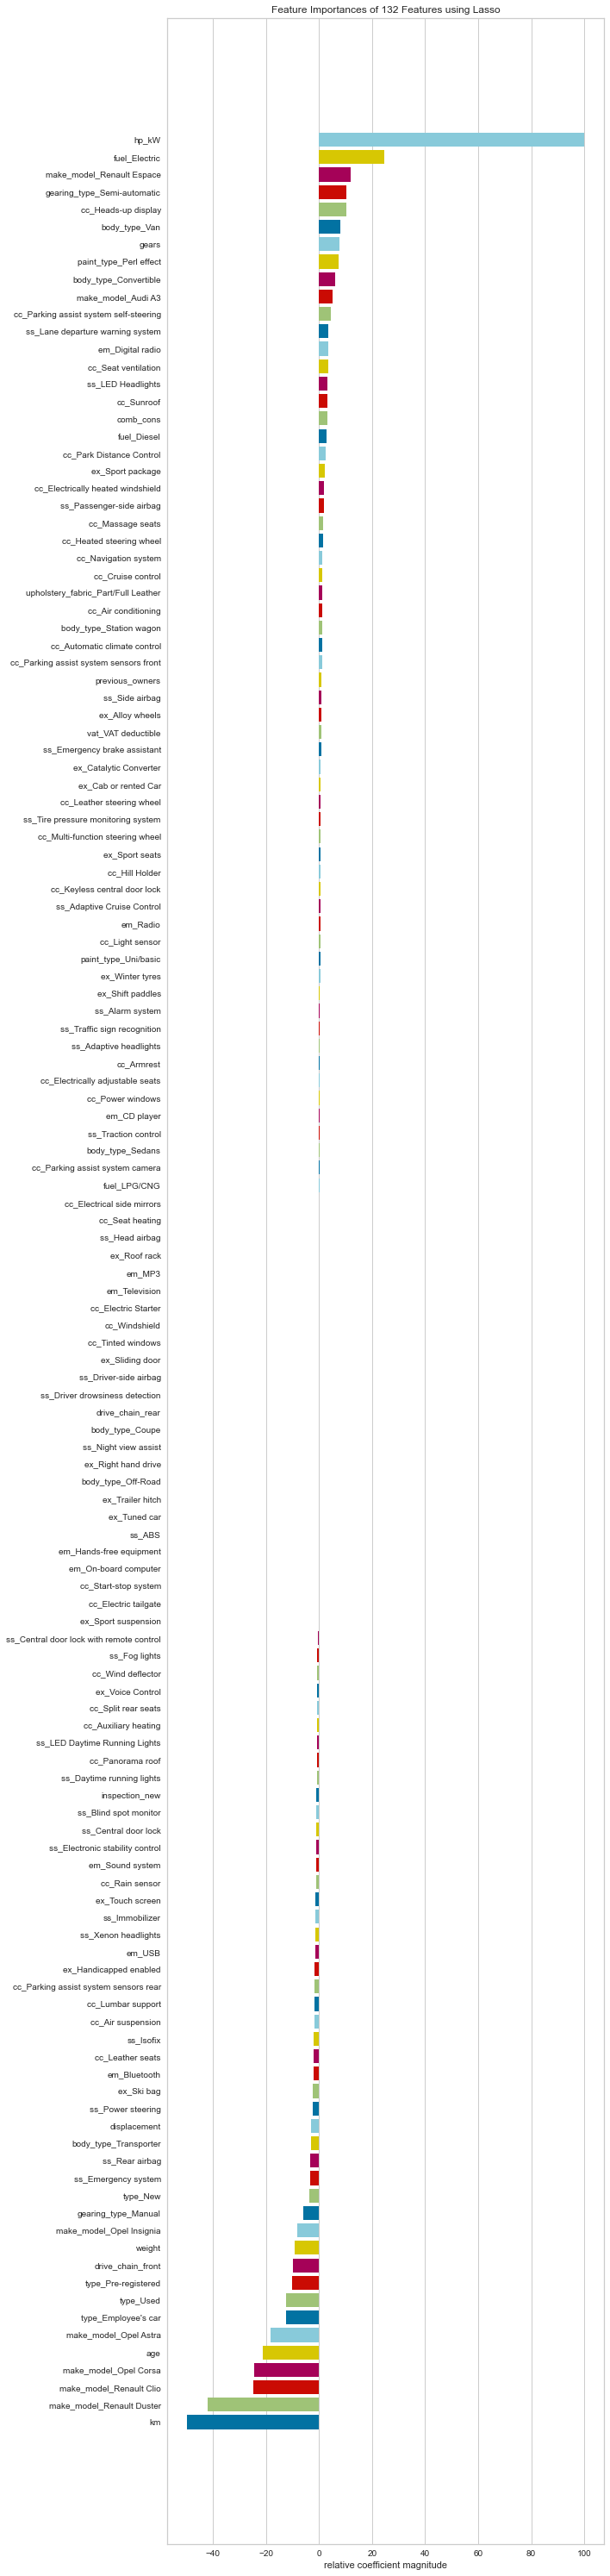

In [146]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = Lasso(alpha=1)

viz = FeatureImportances(model, labels=X_train.columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

In [244]:
df_new = df0[["make_model", "hp_kW", "km","age", "price","gearing_type"]]

In [245]:
df_new.columns

Index(['make_model', 'hp_kW', 'km', 'age', 'price', 'gearing_type'], dtype='object')

In [246]:
df.columns

Index(['price', 'km', 'previous_owners', 'inspection_new', 'displacement',
       'weight', 'gears', 'age', 'hp_kW', 'comb_cons',
       ...
       'paint_type_Perl effect', 'paint_type_Uni/basic', 'gearing_type_Manual',
       'gearing_type_Semi-automatic', 'drive_chain_front', 'drive_chain_rear',
       'fuel_Diesel', 'fuel_Electric', 'fuel_LPG/CNG',
       'upholstery_fabric_Part/Full Leather'],
      dtype='object', length=133)

In [247]:
df_new = pd.get_dummies(df_new)
df_new

,hp_kW,km,age,price,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic
0,66.000,56013.000,3.000,15770,1,0,0,0,0,0,0,0,1,0,0
1,141.000,80000.000,2.000,14500,1,0,0,0,0,0,0,0,1,0,0
2,85.000,83450.000,3.000,14640,1,0,0,0,0,0,0,0,1,0,0
3,66.000,73000.000,3.000,14500,1,0,0,0,0,0,0,0,1,0,0
4,66.000,16200.000,3.000,16790,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15913,147.000,1647.363,0.000,39950,0,0,0,0,0,0,0,1,1,0,0
15914,165.000,9900.000,0.000,39885,0,0,0,0,0,0,0,1,1,0,0
15915,146.000,15.000,0.000,39875,0,0,0,0,0,0,0,1,1,0,0
15916,147.000,10.000,0.000,39700,0,0,0,0,0,0,0,1,1,0,0


In [248]:
len(df_new)

15918

In [249]:
X = df_new.drop(columns = ["price"])
y= df_new.price

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [251]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [252]:
lasso_model = Lasso(alpha=0.28)
lasso_model.fit(X_train_scaled, y_train)


Lasso(alpha=0.28)

In [253]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)
lfs=train_val(y_train, y_train_pred, y_test, y_pred, "Lasso_Feature_Selection")

In [254]:
pd.concat([ls,rs, rgs, lss, lgs, es,egs,lfs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test,grid_lasso_train,grid_lasso_test,elastic_train,elastic_test,GridSearch_train,GridSearch_test,Lasso_Feature_Selection_train,Lasso_Feature_Selection_test
R2,0.890,0.884,0.890,0.885,0.890,0.885,0.890,0.886,0.890,0.885,0.601,0.606,0.890,0.886,0.847,0.850
mae,1704.072,1724.214,1703.140,1721.438,1703.771,1723.117,1705.923,1721.462,1704.136,1722.039,3365.361,3373.447,1705.274,1721.404,1997.547,1949.666
mse,5988175.189,6357641.548,5994312.986,6302468.633,5988478.595,6339797.381,6010672.621,6254079.997,5991012.014,6312719.878,21711590.316,21668342.162,6003385.211,6264813.471,8452908.404,7767947.933
rmse,2447.075,2521.436,2448.329,2510.472,2447.137,2517.895,2451.667,2500.816,2447.654,2512.513,4659.570,4654.927,2450.181,2502.961,2907.389,2787.104


## Cross Validate

In [255]:
model = Lasso()
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [256]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                   0.847
test_neg_mean_absolute_error          -1998.365
test_neg_mean_squared_error        -8473129.155
test_neg_root_mean_squared_error      -2908.119
dtype: float64

## Gridsearch

In [257]:
alpha_space = np.linspace(1.3, 1.5, 21)
alpha_space 

array([1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 ,
       1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 ])

In [258]:
lasso_model = Lasso()

param_grid = {'alpha':alpha_space}

lasso_final_model = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [259]:
lasso_final_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 ,
       1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 ])},
             scoring='neg_root_mean_squared_error')

In [260]:
lasso_final_model.best_params_

{'alpha': 1.3}

In [261]:
lasso_final_model.best_score_

-2908.2072355567675

In [262]:
y_pred = lasso_final_model.predict(X_test_scaled)
y_train_pred = lasso_final_model.predict(X_train_scaled)

In [263]:
lfgs=train_val(y_train, y_train_pred, y_test, y_pred, "lasso_final_model")
lfgs

,lasso_final_model_train,lasso_final_model_test
R2,0.847,0.850
mae,1995.817,1948.794
mse,8454109.191,7769556.529
rmse,2907.595,2787.392


In [264]:
2779/df_new.price.mean()

0.15422389337235698

In [265]:
results=pd.concat([ls,rs, rgs, lss, lgs, es,egs,lfs,lfgs], axis = 1)
results

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test,grid_lasso_train,grid_lasso_test,elastic_train,elastic_test,GridSearch_train,GridSearch_test,Lasso_Feature_Selection_train,Lasso_Feature_Selection_test,lasso_final_model_train,lasso_final_model_test
R2,0.890,0.884,0.890,0.885,0.890,0.885,0.890,0.886,0.890,0.885,0.601,0.606,0.890,0.886,0.847,0.850,0.847,0.850
mae,1704.072,1724.214,1703.140,1721.438,1703.771,1723.117,1705.923,1721.462,1704.136,1722.039,3365.361,3373.447,1705.274,1721.404,1997.547,1949.666,1995.817,1948.794
mse,5988175.189,6357641.548,5994312.986,6302468.633,5988478.595,6339797.381,6010672.621,6254079.997,5991012.014,6312719.878,21711590.316,21668342.162,6003385.211,6264813.471,8452908.404,7767947.933,8454109.191,7769556.529
rmse,2447.075,2521.436,2448.329,2510.472,2447.137,2517.895,2451.667,2500.816,2447.654,2512.513,4659.570,4654.927,2450.181,2502.961,2907.389,2787.104,2907.595,2787.392


## 7. Visually Compare Models Performance In a Graph

In [266]:
scores = {"linear_m": {"r2_score": results.loc["R2","linear_test"] , 
                       "mae": results.loc["mae","linear_test"], 
                       "rmse": results.loc["rmse","linear_test"]},         
          "ridge_m": {"r2_score": results.loc["R2","grid_ridge_test"], 
                      "mae": results.loc["mae","grid_ridge_test"],
                      "rmse": results.loc["rmse","grid_ridge_test"]},
           "lasso_m": {"r2_score": results.loc["R2","grid_lasso_test"],                    
                       "mae": results.loc["mae","grid_lasso_test"], 
                       "rmse": results.loc["rmse","grid_lasso_test"]},
          "elastic_m": {"r2_score": results.loc["R2","GridSearch_test"], 
                        "mae": results.loc["mae","GridSearch_test"],
                        "rmse": results.loc["rmse","GridSearch_test"]},
          "final_m": {"r2_score": results.loc["R2","lasso_final_model_test"], 
                      "mae": results.loc["mae","lasso_final_model_test"] , 
                      "rmse": results.loc["rmse","lasso_final_model_test"]}
    

}
scores = pd.DataFrame(scores).T
scores

,r2_score,mae,rmse
linear_m,0.884,1724.214,2521.436
ridge_m,0.885,1723.117,2517.895
lasso_m,0.885,1722.039,2512.513
elastic_m,0.886,1721.404,2502.961
final_m,0.850,1948.794,2787.392


In [267]:
for i, j in enumerate(scores):
    print(i, j)

0 r2_score
1 mae
2 rmse


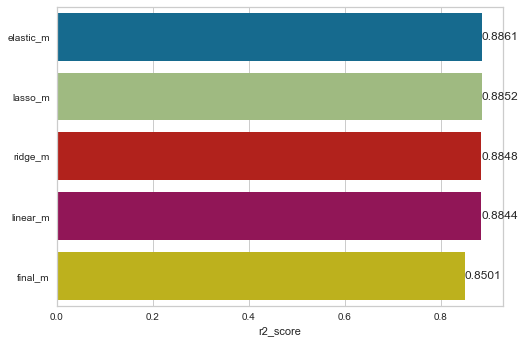

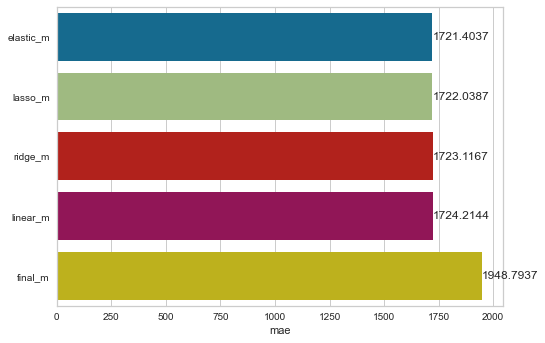

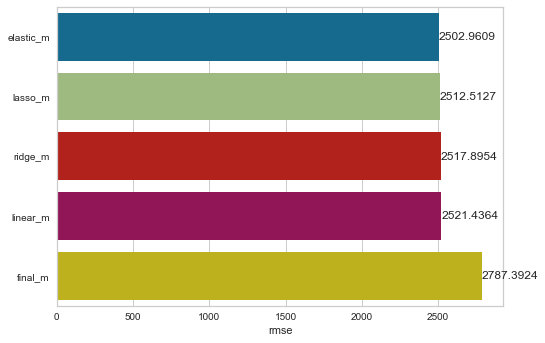

In [268]:
#metrics = scores.columns
for i, j in enumerate(scores):
    plt.figure(i)
    if j == "r2_score":
        ascending = False
    else:
        ascending = True
    compare = scores.sort_values(by=j, ascending=ascending)
    ax = sns.barplot(x = compare[j] , y= compare.index)
    ax.bar_label(ax.containers[0], fmt="%.4f");

## Prediction new observation

In [269]:
final_scaler = MinMaxScaler()
final_scaler.fit(X)
X_scaled = final_scaler.transform(X)

In [270]:
pickle.dump(final_scaler, open('final_scaler.pkl', 'wb'))

<IPython.core.display.Javascript object>

In [296]:
final_model = Lasso(alpha=0.01)

In [297]:
final_model.fit(X_scaled,y)

Lasso(alpha=0.01)

In [298]:
pickle.dump(final_model, open('final_model.pkl', 'wb'))

<IPython.core.display.Javascript object>

In [299]:
loaded_model = pickle.load(open('final_model.pkl', 'rb'))

<IPython.core.display.Javascript object>

In [300]:
X.columns

Index(['hp_kW', 'km', 'age', 'make_model_Audi A1', 'make_model_Audi A3',
       'make_model_Opel Astra', 'make_model_Opel Corsa',
       'make_model_Opel Insignia', 'make_model_Renault Clio',
       'make_model_Renault Duster', 'make_model_Renault Espace',
       'gearing_type_Automatic', 'gearing_type_Manual',
       'gearing_type_Semi-automatic'],
      dtype='object')

In [308]:
my_dict = {
    "hp_kW": 81,
    "age": 2,
    "km": 19000,
    "make_model": 'Audi A3',
    "gearing_type": "Automatic"
}

In [309]:
my_dict = pd.DataFrame([my_dict])
my_dict

,hp_kW,age,km,make_model,gearing_type
0,81,2,19000,Audi A3,Automatic


In [310]:
my_dict = pd.get_dummies(my_dict)
my_dict

,hp_kW,age,km,make_model_Audi A3,gearing_type_Automatic
0,81,2,19000,1,1


In [311]:
X.head(1)

,hp_kW,km,age,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic
0,66.000,56013.000,3.000,1,0,0,0,0,0,0,0,1,0,0


In [312]:
my_dict = my_dict.reindex(columns = X.columns, fill_value=0)
my_dict

,hp_kW,km,age,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic
0,81,19000,2,0,1,0,0,0,0,0,0,1,0,0


In [313]:
my_dict = final_scaler.transform(my_dict)
my_dict

array([[0.16141732, 0.05993691, 0.66666667, 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ]])

In [314]:
final_model.predict(my_dict)

array([20208.44682415])

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___